In [1]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

/Users/austinvuong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Weather data in NYC for the past 10 years
df = pd.read_csv('weatherdata.csv', index_col=0)
df.head()

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN
STATION,,,,,,,,
USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2008-01-01,NaN,47,37
USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2008-01-02,NaN,38,17
USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2008-01-03,NaN,20,12
USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2008-01-04,NaN,36,16
USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2008-01-05,NaN,43,32


In [3]:
maxtemp = df['TMAX'].values
mintemp = df['TMIN'].values

In [4]:
meanmax = maxtemp.mean()
meanmin = mintemp.mean()
print("The mean maximum temperature over the past 10 years is {:.1f} °F".format(meanmax))
print("The mean minimum temperature over the past 10 years is {:.1f} °F".format(meanmin))

The mean maximum temperature over the past 10 years is 63.3 °F
The mean minimum temperature over the past 10 years is 49.0 °F


In [5]:
data2018 = df.loc[df['DATE'] > "2018"]

greater2017 = df['DATE'] > "2017"
less2018 = df['DATE'] < "2018"
data2017 = df[greater2017 & less2018]

greater2016 = df['DATE'] > "2016"
less2017 = df['DATE'] < "2017"
data2016 = df[greater2016 & less2017]

greater2015 = df['DATE'] > "2015"
less2016 = df['DATE'] < "2016"
data2015 = df[greater2015 & less2016]

greater2014 = df['DATE'] > "2014"
less2015 = df['DATE'] < "2015"
data2014 = df[greater2014 & less2015]

greater2013 = df['DATE'] > "2013"
less2014 = df['DATE'] < "2014"
data2013 = df[greater2013 & less2014]

greater2012 = df['DATE'] > "2012"
less2013 = df['DATE'] < "2013"
data2012 = df[greater2012 & less2013]

greater2011 = df['DATE'] > "2011"
less2012 = df['DATE'] < "2012"
data2011 = df[greater2011 & less2012]

greater2010 = df['DATE'] > "2010"
less2011 = df['DATE'] < "2011"
data2010 = df[greater2010 & less2011]

# print(data2018['DATE'].count())
# print(data2017['DATE'].count())
# print(data2016['DATE'].count())
# print(data2015['DATE'].count())
# print(data2014['DATE'].count())
# print(data2013['DATE'].count())
# print(data2012['DATE'].count())
# print(data2011['DATE'].count())
# print(data2010['DATE'].count())

In [6]:
maxtemp10 = data2010['TMAX'].values
mintemp10 = data2010['TMIN'].values
meanmax10 = maxtemp10.mean()
meanmin10 = mintemp10.mean()
print("The mean maximum temperature in 2010 was {:.1f} °F".format(meanmax10))
print("The mean minimum temperature in 2010 was {:.1f} °F".format(meanmin10))

The mean maximum temperature in 2010 was 64.0 °F
The mean minimum temperature in 2010 was 49.6 °F


In [7]:
maxtemp11 = data2011['TMAX'].values
mintemp11 = data2011['TMIN'].values
meanmax11 = maxtemp11.mean()
meanmin11 = mintemp11.mean()
print("The mean maximum temperature in 2011 was {:.1f} °F".format(meanmax11))
print("The mean minimum temperature in 2011 was {:.1f} °F".format(meanmin11))
diffmax11 = meanmax11 - meanmax10
print("The difference between the mean maximum temperature is {:.1f}".format(diffmax11))
diffmin11 = meanmin11 - meanmin10
print("The difference between the mean maximum temperature is {:.1f}".format(diffmin11))

The mean maximum temperature in 2011 was 63.7 °F
The mean minimum temperature in 2011 was 49.3 °F
The difference between the mean maximum temperature is -0.2
The difference between the mean maximum temperature is -0.3


In [8]:
maxtemp12 = data2012['TMAX'].values
mintemp12 = data2012['TMIN'].values
meanmax12 = maxtemp12.mean()
meanmin12 = mintemp12.mean()
print("The mean maximum temperature in 2012 was {:.1f} °F".format(meanmax12))
print("The mean minimum temperature in 2012 was {:.1f} °F".format(meanmin12))
diffmax12 = meanmax12 - meanmax11
print("The difference between the mean maximum temperature is {:.1f}".format(diffmax12))
diffmin12 = meanmin12 - meanmin11
print("The difference between the mean maximum temperature is {:.1f}".format(diffmin12))

The mean maximum temperature in 2012 was 64.4 °F
The mean minimum temperature in 2012 was 50.3 °F
The difference between the mean maximum temperature is 0.6
The difference between the mean maximum temperature is 1.0


In [9]:
maxtemp13 = data2013['TMAX'].values
mintemp13 = data2013['TMIN'].values
meanmax13 = maxtemp13.mean()
meanmin13 = mintemp13.mean()
print("The mean maximum temperature in 2013 was {:.1f} °F".format(meanmax13))
print("The mean minimum temperature in 2013 was {:.1f} °F".format(meanmin13))
diffmax13 = meanmax13 - meanmax12
print("The difference between the mean maximum temperature is {:.1f}".format(diffmax13))
diffmin13 = meanmin13 - meanmin12
print("The difference between the mean maximum temperature is {:.1f}".format(diffmin13))

The mean maximum temperature in 2013 was 62.4 °F
The mean minimum temperature in 2013 was 48.5 °F
The difference between the mean maximum temperature is -2.0
The difference between the mean maximum temperature is -1.8


In [10]:
maxtemp14 = data2014['TMAX'].values
mintemp14 = data2014['TMIN'].values
meanmax14 = maxtemp14.mean()
meanmin14 = mintemp14.mean()
print("The mean maximum temperature in 2014 was {:.1f} °F".format(meanmax14))
print("The mean minimum temperature in 2014 was {:.1f} °F".format(meanmin14))
diffmax14 = meanmax14 - meanmax13
print("The difference between the mean maximum temperature is {:.1f}".format(diffmax14))
diffmin14 = meanmin14 - meanmin13
print("The difference between the mean maximum temperature is {:.1f}".format(diffmin14))

The mean maximum temperature in 2014 was 61.7 °F
The mean minimum temperature in 2014 was 47.3 °F
The difference between the mean maximum temperature is -0.7
The difference between the mean maximum temperature is -1.2


In [11]:
maxtemp15 = data2015['TMAX'].values
mintemp15 = data2015['TMIN'].values
meanmax15 = maxtemp15.mean()
meanmin15 = mintemp15.mean()
print("The mean maximum temperature in 2015 was {:.1f} °F".format(meanmax15))
print("The mean minimum temperature in 2015 was {:.1f} °F".format(meanmin15))
diffmax15 = meanmax15 - meanmax14
print("The difference between the mean maximum temperature is {:.1f}".format(diffmax14))
diffmin15 = meanmin15 - meanmin14
print("The difference between the mean maximum temperature is {:.1f}".format(diffmin14))

The mean maximum temperature in 2015 was 64.3 °F
The mean minimum temperature in 2015 was 49.4 °F
The difference between the mean maximum temperature is -0.7
The difference between the mean maximum temperature is -1.2


In [12]:
maxtemp16 = data2016['TMAX'].values
mintemp16 = data2016['TMIN'].values
meanmax16 = maxtemp16.mean()
meanmin16 = mintemp16.mean()
print("The mean maximum temperature in 2016 was {:.1f} °F".format(meanmax16))
print("The mean minimum temperature in 2016 was {:.1f} °F".format(meanmin16))
diffmax16 = meanmax16 - meanmax15
print("The difference between the mean maximum temperature is {:.1f}".format(diffmax16))
diffmin16 = meanmin16 - meanmin15
print("The difference between the mean maximum temperature is {:.1f}".format(diffmin16))

The mean maximum temperature in 2016 was 64.6 °F
The mean minimum temperature in 2016 was 49.8 °F
The difference between the mean maximum temperature is 0.3
The difference between the mean maximum temperature is 0.4


In [13]:
maxtemp17 = data2017['TMAX'].values
mintemp17 = data2017['TMIN'].values
meanmax17 = maxtemp17.mean()
meanmin17 = mintemp17.mean()
print("The mean maximum temperature in 2017 was {:.1f} °F".format(meanmax17))
print("The mean minimum temperature in 2017 was {:.1f} °F".format(meanmin17))
diffmax17 = meanmax17 - meanmax16
print("The difference between the mean maximum temperature is {:.1f}".format(diffmax17))
diffmin17 = meanmin17 - meanmin16
print("The difference between the mean maximum temperature is {:.1f}".format(diffmin17))

The mean maximum temperature in 2017 was 63.3 °F
The mean minimum temperature in 2017 was 49.6 °F
The difference between the mean maximum temperature is -1.4
The difference between the mean maximum temperature is -0.2


In [14]:
maxtemp18 = data2018['TMAX'].values
mintemp18 = data2018['TMIN'].values
meanmax18 = maxtemp18.mean()
meanmin18 = mintemp18.mean()
print("The mean maximum temperature in 2018 was {:.1f} °F".format(meanmax18))
print("The mean minimum temperature in 2018 was {:.1f} °F".format(meanmin18))
diffmax18 = meanmax18 - meanmax17
print("The difference between the mean maximum temperature is {:.1f}".format(diffmax18))
diffmin18 = meanmin18 - meanmin17
print("The difference between the mean maximum temperature is {:.1f}".format(diffmin18))

The mean maximum temperature in 2018 was 64.2 °F
The mean minimum temperature in 2018 was 50.6 °F
The difference between the mean maximum temperature is 0.9
The difference between the mean maximum temperature is 1.0


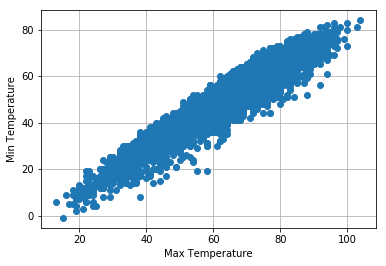

In [15]:
xaxis = np.array(df['TMAX'])
yaxis = np.array(df['TMIN']) 
plt.plot(xaxis, yaxis, 'o') 
plt.xlabel('Max Temperature') 
plt.ylabel('Min Temperature') 
plt.grid(True)

In [16]:
jan18 = df['DATE'] > "2018-01"
janend18 = df['DATE'] < "2018-02"
feb18 = df['DATE'] > "2018-02"
febend18 = df['DATE'] <= "2018-02-28"
mar18 = df['DATE'] > "2018-03"
marend18 = df['DATE'] < "2018-04"
apr18 = df['DATE'] > "2018-04"
aprend18 = df['DATE'] < "2018-05"
may18 = df['DATE'] > "2018-05"
mayend18 = df['DATE'] < "2018-06"
jun18 = df['DATE'] > "2018-06"
junend18 = df['DATE'] < "2018-07"
jul18 = df['DATE'] > "2018-07"
julend18 = df['DATE'] < "2018-08"
aug18 = df['DATE'] > "2018-08"
augend18 = df['DATE'] < "2018-09"
sep18 = df['DATE'] > "2018-09"
sepend18 = df['DATE'] < "2018-10"
oct18 = df['DATE'] > "2018-10"
octend18 = df['DATE'] < "2018-11"
nov18 = df['DATE'] > "2018-11"
novend18 = df['DATE'] < "2018-12"
# dec18 = df['DATE'] > "2018-12"

jan17 = df['DATE'] > "2017-01"
janend17 = df['DATE'] < "2017-02"
feb17 = df['DATE'] > "2017-02"
febend17 = df['DATE'] <= "2017-02-28"
mar17 = df['DATE'] > "2017-03"
marend17 = df['DATE'] < "2017-04"
apr17 = df['DATE'] > "2017-04"
aprend17 = df['DATE'] < "2017-05"
may17 = df['DATE'] > "2017-05"
mayend17 = df['DATE'] < "2017-06"
jun17 = df['DATE'] > "2017-06"
junend17 = df['DATE'] < "2017-07"
jul17 = df['DATE'] > "2017-07"
julend17 = df['DATE'] < "2017-08"
aug17 = df['DATE'] > "2017-08"
augend17 = df['DATE'] < "2017-09"
sep17 = df['DATE'] > "2017-09"
sepend17 = df['DATE'] < "2017-10"
oct17 = df['DATE'] > "2017-10"
octend17 = df['DATE'] < "2017-11"
nov17 = df['DATE'] > "2017-11"
novend17 = df['DATE'] < "2017-12"
dec17 = df['DATE'] > "2017-12"
decend17 = df['DATE'] < "2018"

jan16 = df['DATE'] > "2016-01"
janend16 = df['DATE'] < "2016-02"
feb16 = df['DATE'] > "2016-02"
febend16 = df['DATE'] <= "2016-02-28"
mar16 = df['DATE'] > "2016-03"
marend16 = df['DATE'] < "2016-04"
apr16 = df['DATE'] > "2016-04"
aprend16 = df['DATE'] < "2016-05"
may16 = df['DATE'] > "2016-05"
mayend16 = df['DATE'] < "2016-06"
jun16 = df['DATE'] > "2016-06"
junend16 = df['DATE'] < "2016-07"
jul16 = df['DATE'] > "2016-07"
julend16 = df['DATE'] < "2016-08"
aug16 = df['DATE'] > "2016-08"
augend16 = df['DATE'] < "2016-09"
sep16 = df['DATE'] > "2016-09"
sepend16 = df['DATE'] < "2016-10"
oct16 = df['DATE'] > "2016-10"
octend16 = df['DATE'] < "2016-11"
nov16 = df['DATE'] > "2016-11"
novend16 = df['DATE'] < "2016-12"
dec16 = df['DATE'] > "2016-12"
decend16 = df['DATE'] < "2017"

jan15 = df['DATE'] > "2015-01"
janend15 = df['DATE'] < "2015-02"
feb15 = df['DATE'] > "2015-02"
febend15 = df['DATE'] <= "2015-02-28"
mar15 = df['DATE'] > "2015-03"
marend15 = df['DATE'] < "2015-04"
apr15 = df['DATE'] > "2015-04"
aprend15 = df['DATE'] < "2015-05"
may15 = df['DATE'] > "2015-05"
mayend15 = df['DATE'] < "2015-06"
jun15 = df['DATE'] > "2015-06"
junend15 = df['DATE'] < "2015-07"
jul15 = df['DATE'] > "2015-07"
julend15 = df['DATE'] < "2015-08"
aug15 = df['DATE'] > "2015-08"
augend15 = df['DATE'] < "2015-09"
sep15 = df['DATE'] > "2015-09"
sepend15 = df['DATE'] < "2015-10"
oct15 = df['DATE'] > "2015-10"
octend15 = df['DATE'] < "2015-11"
nov15 = df['DATE'] > "2015-11"
novend15 = df['DATE'] < "2015-12"
dec15 = df['DATE'] > "2015-12"
decend15 = df['DATE'] < "2016"

jan14 = df['DATE'] > "2014-01"
janend14 = df['DATE'] < "2014-02"
feb14 = df['DATE'] > "2014-02"
febend14 = df['DATE'] <= "2014-02-28"
mar14 = df['DATE'] > "2014-03"
marend14 = df['DATE'] < "2014-04"
apr14 = df['DATE'] > "2014-04"
aprend14 = df['DATE'] < "2014-05"
may14 = df['DATE'] > "2014-05"
mayend14 = df['DATE'] < "2014-06"
jun14 = df['DATE'] > "2014-06"
junend14 = df['DATE'] < "2014-07"
jul14 = df['DATE'] > "2014-07"
julend14 = df['DATE'] < "2014-08"
aug14 = df['DATE'] > "2014-08"
augend14 = df['DATE'] < "2014-09"
sep14 = df['DATE'] > "2014-09"
sepend14 = df['DATE'] < "2014-10"
oct14 = df['DATE'] > "2014-10"
octend14 = df['DATE'] < "2014-11"
nov14 = df['DATE'] > "2014-11"
novend14 = df['DATE'] < "2014-12"
dec14 = df['DATE'] > "2014-12"
decend14 = df['DATE'] < "2015"

jan13 = df['DATE'] > "2013-01"
janend13 = df['DATE'] < "2013-02"
feb13 = df['DATE'] > "2013-02"
febend13 = df['DATE'] <= "2013-02-28"
mar13 = df['DATE'] > "2013-03"
marend13 = df['DATE'] < "2013-04"
apr13 = df['DATE'] > "2013-04"
aprend13 = df['DATE'] < "2013-05"
may13 = df['DATE'] > "2013-05"
mayend13 = df['DATE'] < "2013-06"
jun13 = df['DATE'] > "2013-06"
junend13 = df['DATE'] < "2013-07"
jul13 = df['DATE'] > "2013-07"
julend13 = df['DATE'] < "2013-08"
aug13 = df['DATE'] > "2013-08"
augend13 = df['DATE'] < "2013-09"
sep13 = df['DATE'] > "2013-09"
sepend13 = df['DATE'] < "2013-10"
oct13 = df['DATE'] > "2013-10"
octend13 = df['DATE'] < "2013-11"
nov13 = df['DATE'] > "2013-11"
novend13 = df['DATE'] < "2013-12"
dec13 = df['DATE'] > "2013-12"
decend13 = df['DATE'] < "2014"

jan12 = df['DATE'] > "2012-01"
janend12 = df['DATE'] < "2012-02"
feb12 = df['DATE'] > "2012-02"
febend12 = df['DATE'] <= "2012-02-28"
mar12 = df['DATE'] > "2012-03"
marend12 = df['DATE'] < "2012-04"
apr12 = df['DATE'] > "2012-04"
aprend12 = df['DATE'] < "2012-05"
may12 = df['DATE'] > "2012-05"
mayend12 = df['DATE'] < "2012-06"
jun12 = df['DATE'] > "2012-06"
junend12 = df['DATE'] < "2012-07"
jul12 = df['DATE'] > "2012-07"
julend12 = df['DATE'] < "2012-08"
aug12 = df['DATE'] > "2012-08"
augend12 = df['DATE'] < "2012-09"
sep12 = df['DATE'] > "2012-09"
sepend12 = df['DATE'] < "2012-10"
oct12 = df['DATE'] > "2012-10"
octend12 = df['DATE'] < "2012-11"
nov12 = df['DATE'] > "2012-11"
novend12 = df['DATE'] < "2012-12"
dec12 = df['DATE'] > "2012-12"
decend12 = df['DATE'] < "2013"

jan11 = df['DATE'] > "2011-01"
janend11 = df['DATE'] < "2011-02"
feb11 = df['DATE'] > "2011-02"
febend11 = df['DATE'] <= "2011-02-28"
mar11 = df['DATE'] > "2011-03"
marend11 = df['DATE'] < "2011-04"
apr11 = df['DATE'] > "2011-04"
aprend11 = df['DATE'] < "2011-05"
may11 = df['DATE'] > "2011-05"
mayend11 = df['DATE'] < "2011-06"
jun11 = df['DATE'] > "2011-06"
junend11 = df['DATE'] < "2011-07"
jul11 = df['DATE'] > "2011-07"
julend11 = df['DATE'] < "2011-08"
aug11 = df['DATE'] > "2011-08"
augend11 = df['DATE'] < "2011-09"
sep11 = df['DATE'] > "2011-09"
sepend11 = df['DATE'] < "2011-10"
oct11 = df['DATE'] > "2011-10"
octend11 = df['DATE'] < "2011-11"
nov11 = df['DATE'] > "2011-11"
novend11 = df['DATE'] < "2011-12"
dec11 = df['DATE'] > "2011-12"
decend11 = df['DATE'] < "2012"

jan10 = df['DATE'] > "2010-01"
janend10 = df['DATE'] < "2010-02"
feb10 = df['DATE'] > "2010-02"
febend10 = df['DATE'] <= "2010-02-28"
mar10 = df['DATE'] > "2010-03"
marend10 = df['DATE'] < "2010-04"
apr10 = df['DATE'] > "2010-04"
aprend10 = df['DATE'] < "2010-05"
may10 = df['DATE'] > "2010-05"
mayend10 = df['DATE'] < "2010-06"
jun10 = df['DATE'] > "2010-06"
junend10 = df['DATE'] < "2010-07"
jul10 = df['DATE'] > "2010-07"
julend10 = df['DATE'] < "2010-08"
aug10 = df['DATE'] > "2010-08"
augend10 = df['DATE'] < "2010-09"
sep10 = df['DATE'] > "2010-09"
sepend10 = df['DATE'] < "2010-10"
oct10 = df['DATE'] > "2010-10"
octend10 = df['DATE'] < "2010-11"
nov10 = df['DATE'] > "2010-11"
novend10 = df['DATE'] < "2010-12"
dec10 = df['DATE'] > "2010-12"
decend10 = df['DATE'] < "2011"

In [17]:
datajan = np.vstack((df[jan18 & janend18], df[jan17 & janend17], df[jan16 & janend16], 
                     df[jan15 & janend15], df[jan14 & janend14], df[jan13 & janend13], 
                     df[jan12 & janend12], df[jan11 & janend11], df[jan10 & janend10]))
#print(datajan[270:300])
#print(df[jan14][30:60])
#print(df[janend14][30:60])
# print(datajan[0:60])
datafeb = np.vstack((df[feb18 & febend18], df[feb17 & febend17], df[feb16 & febend16], 
                     df[feb15 & febend15], df[feb14 & febend14], df[feb13 & febend13], 
                     df[feb12 & febend12], df[feb11 & febend11], df[feb10 & febend10]))
datamar = np.vstack((df[mar18 & marend18], df[mar17 & marend17], df[mar16 & marend16], 
                     df[mar15 & marend15], df[mar14 & marend14], df[mar13 & marend13], 
                     df[mar12 & marend12], df[mar11 & marend11], df[mar10 & marend10]))
# print(datamar[121:180])
dataapr = np.vstack((df[apr18 & aprend18], df[apr17 & aprend17], df[apr16 & aprend16], 
                     df[apr15 & aprend15], df[apr14 & aprend14], df[apr13 & aprend13], 
                     df[apr12 & aprend12], df[apr11 & aprend11], df[apr10 & aprend10]))
datamay = np.vstack((df[may18 & mayend18], df[may17 & mayend17], df[may16 & mayend16], 
                     df[may15 & mayend15], df[may14 & mayend14], df[may13 & mayend13], 
                     df[may12 & mayend12], df[may11 & mayend11], df[may10 & mayend10]))
datajun = np.vstack((df[jun18 & junend18], df[jun17 & junend17], df[jun16 & junend16], 
                     df[jun15 & junend15], df[jun14 & junend14], df[jun13 & junend13], 
                     df[jun12 & junend12], df[jun11 & junend11], df[jun10 & junend10]))
datajul = np.vstack((df[jul18 & julend18], df[jul17 & julend17], df[jul16 & julend16], 
                     df[jul15 & julend15], df[jul14 & julend14], df[jul13 & julend13], 
                     df[jul12 & julend12], df[jul11 & julend11], df[jul10 & julend10]))
dataaug = np.vstack((df[aug18 & augend18], df[aug17 & augend17], df[aug16 & augend16], 
                     df[aug15 & augend15], df[aug14 & augend14], df[aug13 & augend13], 
                     df[aug12 & augend12], df[aug11 & augend11], df[aug10 & augend10]))
datasep = np.vstack((df[sep18 & sepend18], df[sep17 & sepend17], df[sep16 & sepend16], 
                     df[sep15 & sepend15], df[sep14 & sepend14], df[sep13 & sepend13], 
                     df[sep12 & sepend12], df[sep11 & sepend11], df[sep10 & sepend10]))
dataoct = np.vstack((df[oct18 & octend18], df[oct17 & octend17], df[oct16 & octend16], 
                     df[oct15 & octend15], df[oct14 & octend14], df[oct13 & octend13], 
                     df[oct12 & octend12], df[oct11 & octend11], df[oct10 & octend10]))
datanov = np.vstack((df[nov18 & novend18], df[nov17 & novend17], df[nov16 & novend16], 
                     df[nov15 & novend15], df[nov14 & novend14], df[nov13 & novend13], 
                     df[nov12 & novend12], df[nov11 & novend11], df[nov10 & novend10]))
datadec = np.vstack((df[dec17 & decend17], df[dec16 & decend16], 
                     df[dec15 & decend15], df[dec14 & decend14], df[dec13 & decend13], 
                     df[dec12 & decend12], df[dec11 & decend11], df[dec10 & decend10]))
print(datadec[0:60])

[['NY CITY CENTRAL PARK, NY US' 40.77898 -73.96925 42.7 '2017-12-01' nan
  52 42]
 ['NY CITY CENTRAL PARK, NY US' 40.77898 -73.96925 42.7 '2017-12-02' nan
  48 39]
 ['NY CITY CENTRAL PARK, NY US' 40.77898 -73.96925 42.7 '2017-12-03' nan
  48 42]
 ['NY CITY CENTRAL PARK, NY US' 40.77898 -73.96925 42.7 '2017-12-04' nan
  51 40]
 ['NY CITY CENTRAL PARK, NY US' 40.77898 -73.96925 42.7 '2017-12-05' nan
  61 50]
 ['NY CITY CENTRAL PARK, NY US' 40.77898 -73.96925 42.7 '2017-12-06' nan
  59 40]
 ['NY CITY CENTRAL PARK, NY US' 40.77898 -73.96925 42.7 '2017-12-07' nan
  44 37]
 ['NY CITY CENTRAL PARK, NY US' 40.77898 -73.96925 42.7 '2017-12-08' nan
  39 34]
 ['NY CITY CENTRAL PARK, NY US' 40.77898 -73.96925 42.7 '2017-12-09' nan
  35 30]
 ['NY CITY CENTRAL PARK, NY US' 40.77898 -73.96925 42.7 '2017-12-10' nan
  39 29]
 ['NY CITY CENTRAL PARK, NY US' 40.77898 -73.96925 42.7 '2017-12-11' nan
  41 33]
 ['NY CITY CENTRAL PARK, NY US' 40.77898 -73.96925 42.7 '2017-12-12' nan
  50 29]
 ['NY CITY CENTR

In [18]:
datamax = {2018: meanmax18, 2017: meanmax17, 2016: meanmax16, 2015: meanmax15, 2014: meanmax14, 
           2013: meanmax13, 2012: meanmax12, 2011: meanmax11, 2010: meanmax10}
datamin = {2018: meanmin18, 2017: meanmin17, 2016: meanmin16, 2015: meanmin15, 2014: meanmin14, 
           2013: meanmin13, 2012: meanmin12, 2011: meanmin11, 2010: meanmin10}

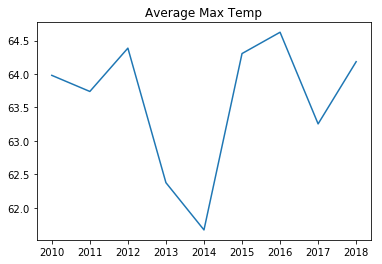

In [47]:
years = list(datamax.keys())
maxmeans = list(datamax.values())
plt.title("Average Max Temp")
plt.plot(years, maxmeans)

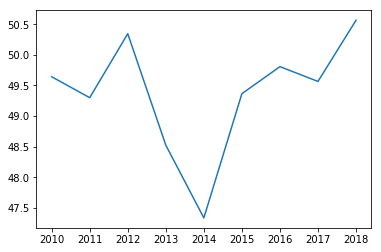

In [20]:
minmeans = list(datamin.values())
plt.plot(years, minmeans)

In [21]:
jan2010 = df['DATE'] >= "2010-01-01"
janEnd2010 = df['DATE'] <= "2010-01-31"
dataJan = df[jan2010 & janEnd2010]
dataJan.head()

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN
STATION,,,,,,,,
USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-01-01,NaN,40,33
USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-01-02,NaN,34,17
USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-01-03,NaN,22,17
USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-01-04,NaN,30,19
USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-01-05,NaN,30,20


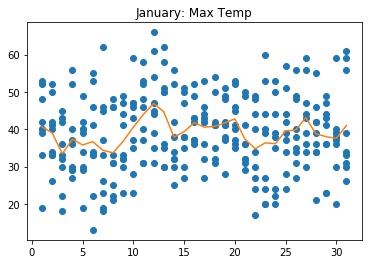

In [22]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))

dayJan = day
for i in range(1, 9):
    dayJan = np.vstack((dayJan, day))

plt.plot(dayJan, datajan[:, 6], 'o')

avg = np.zeros((31, 1))
for i in range(0, 9):
    for j in range(0, 31):
        avg[j] = avg[j] + datajan[i * 31 + j][6]
plt.title("January: Max Temp")
plt.plot(dayJan[:31], avg / 9)

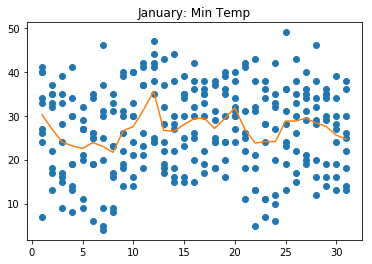

In [23]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))

dayJan = day
for i in range(1, 9):
    dayJan = np.vstack((dayJan, day))

plt.plot(dayJan, datajan[:, 7], 'o')

avg = np.zeros((31, 1))
for i in range(0, 9):
    for j in range(0, 31):
        avg[j] = avg[j] + datajan[i * 31 + j][7]
plt.title("January: Min Temp")
plt.plot(dayJan[:31], avg / 9)

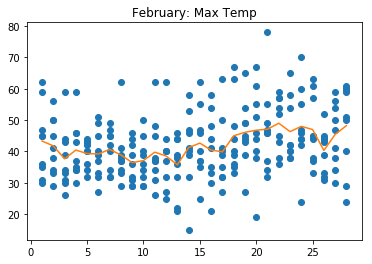

In [24]:
day = [1]
for i in range(2, 29):
    day = np.vstack((day, [i]))

dayFeb = day
for i in range(1, 9):
    dayFeb = np.vstack((dayFeb, day))

plt.plot(dayFeb, datafeb[:, 6], 'o')

avg = np.zeros((28, 1))
for i in range(0, 9):
    for j in range(0, 28):
        avg[j] = avg[j] + datafeb[i * 28 + j][6]
plt.title("February: Max Temp")
plt.plot(dayFeb[:28], avg / 9)

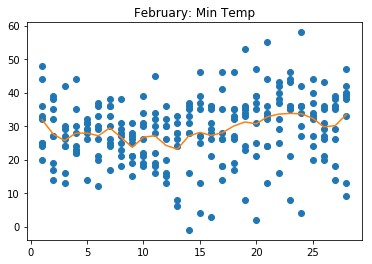

In [25]:
day = [1]
for i in range(2, 29):
    day = np.vstack((day, [i]))

dayFeb = day
for i in range(1, 9):
    dayFeb = np.vstack((dayFeb, day))

plt.plot(dayFeb, datafeb[:, 7], 'o')

avg = np.zeros((28, 1))
for i in range(0, 9):
    for j in range(0, 28):
        avg[j] = avg[j] + datafeb[i * 28 + j][7]
plt.title("February: Min Temp")
plt.plot(dayFeb[:28], avg / 9)

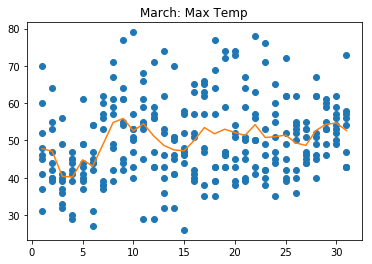

In [26]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))

dayMar = day
for i in range(1, 9):
    dayMar = np.vstack((dayMar, day))

plt.plot(dayMar, datamar[:, 6], 'o')

avg = np.zeros((31, 1))
for i in range(0, 9):
    for j in range(0, 31):
        avg[j] = avg[j] + datamar[i * 31 + j][6]
plt.title("March: Max Temp")
plt.plot(dayMar[:31], avg / 9)


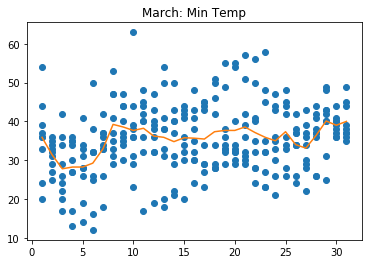

In [27]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))

dayMar = day
for i in range(1, 9):
    dayMar = np.vstack((dayMar, day))

plt.plot(dayMar, datamar[:, 7], 'o')

avg = np.zeros((31, 1))
for i in range(0, 9):
    for j in range(0, 31):
        avg[j] = avg[j] + datamar[i * 31 + j][7]
plt.title("March: Min Temp")
plt.plot(dayMar[:31], avg / 9)

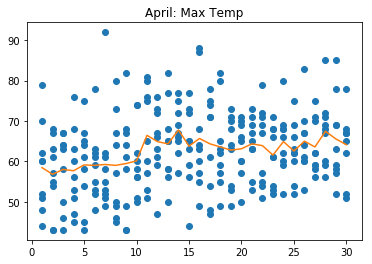

In [28]:
day = [1]
for i in range(2, 31):
    day = np.vstack((day, [i]))

dayApr = day
for i in range(1, 9):
    dayApr = np.vstack((dayApr, day))

plt.plot(dayApr, dataapr[:, 6], 'o')

avg = np.zeros((30, 1))
for i in range(0, 9):
    for j in range(0, 30):
        avg[j] = avg[j] + dataapr[i * 30 + j][6]
plt.title("April: Max Temp")
plt.plot(dayApr[:30], avg / 9)


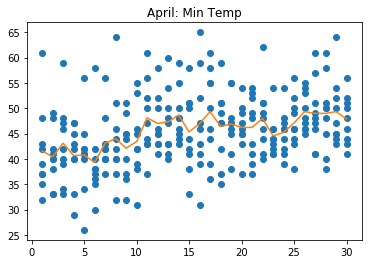

In [29]:
day = [1]
for i in range(2, 31):
    day = np.vstack((day, [i]))

dayApr = day
for i in range(1, 9):
    dayApr = np.vstack((dayApr, day))

plt.plot(dayApr, dataapr[:, 7], 'o')

avg = np.zeros((30, 1))
for i in range(0, 9):
    for j in range(0, 30):
        avg[j] = avg[j] + dataapr[i * 30 + j][7]
plt.title("April: Min Temp")
plt.plot(dayApr[:30], avg / 9)

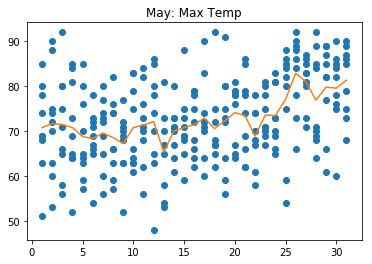

In [30]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))

dayMay = day
for i in range(1, 9):
    dayMay = np.vstack((dayMay, day))

plt.plot(dayMay, datamay[:, 6], 'o')

avg = np.zeros((31, 1))
for i in range(0, 9):
    for j in range(0, 31):
        avg[j] = avg[j] + datamay[i * 31 + j][6]
plt.title("May: Max Temp")
plt.plot(dayMay[:31], avg / 9)


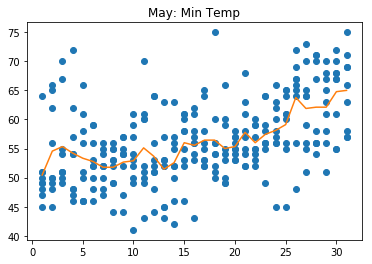

In [31]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))

dayMay = day
for i in range(1, 9):
    dayMay = np.vstack((dayMay, day))

plt.plot(dayMay, datamay[:, 7], 'o')

avg = np.zeros((31, 1))
for i in range(0, 9):
    for j in range(0, 31):
        avg[j] = avg[j] + datamay[i * 31 + j][7]
plt.title("May: Min Temp")
plt.plot(dayMay[:31], avg / 9)


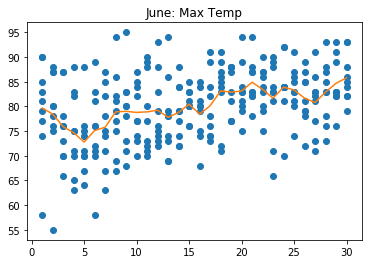

In [32]:
day = [1]
for i in range(2, 31):
    day = np.vstack((day, [i]))

dayJun = day
for i in range(1, 9):
    dayJun = np.vstack((dayJun, day))

plt.plot(dayJun, datajun[:, 6], 'o')

avg = np.zeros((30, 1))
for i in range(0, 9):
    for j in range(0, 30):
        avg[j] = avg[j] + datajun[i * 30 + j][6]
plt.title("June: Max Temp")
plt.plot(dayJun[:30], avg / 9)


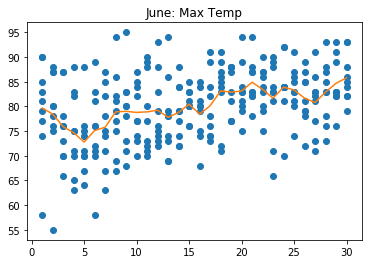

In [33]:
day = [1]
for i in range(2, 31):
    day = np.vstack((day, [i]))

dayJun = day
for i in range(1, 9):
    dayJun = np.vstack((dayJun, day))

plt.plot(dayJun, datajun[:, 6], 'o')

avg = np.zeros((30, 1))
for i in range(0, 9):
    for j in range(0, 30):
        avg[j] = avg[j] + datajun[i * 30 + j][6]
plt.title("June: Max Temp")
plt.plot(dayJun[:30], avg / 9)


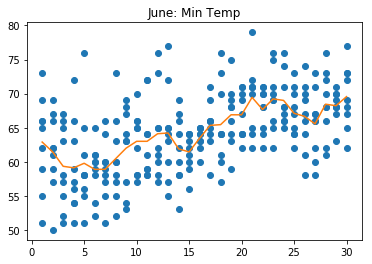

In [34]:
day = [1]
for i in range(2, 31):
    day = np.vstack((day, [i]))

dayJun = day
for i in range(1, 9):
    dayJun = np.vstack((dayJun, day))

plt.plot(dayJun, datajun[:, 7], 'o')

avg = np.zeros((30, 1))
for i in range(0, 9):
    for j in range(0, 30):
        avg[j] = avg[j] + datajun[i * 30 + j][7]
plt.title("June: Min Temp")
plt.plot(dayJun[:30], avg / 9)

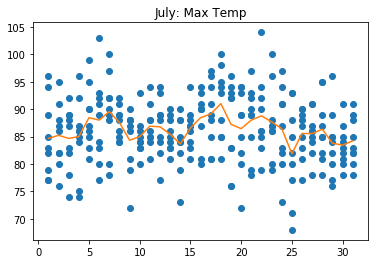

In [35]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))

dayJul = day
for i in range(1, 9):
    dayJul = np.vstack((dayJul, day))

plt.plot(dayJul, datajul[:, 6], 'o')

avg = np.zeros((31, 1))
for i in range(0, 9):
    for j in range(0, 31):
        avg[j] = avg[j] + datajul[i * 31 + j][6]
plt.title("July: Max Temp")
plt.plot(dayJul[:31], avg / 9)


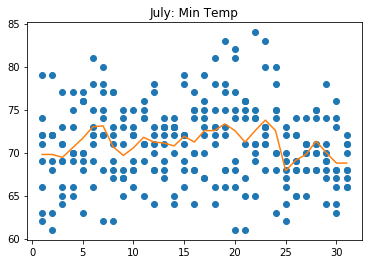

In [36]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))

dayJul = day
for i in range(1, 9):
    dayJul = np.vstack((dayJul, day))

plt.plot(dayJul, datajul[:, 7], 'o')

avg = np.zeros((31, 1))
for i in range(0, 9):
    for j in range(0, 31):
        avg[j] = avg[j] + datajul[i * 31 + j][7]
plt.title("July: Min Temp")
plt.plot(dayJul[:31], avg / 9)


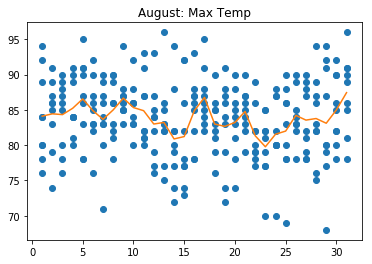

In [37]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))

dayAug = day
for i in range(1, 9):
    dayAug = np.vstack((dayAug, day))

plt.plot(dayAug, dataaug[:, 6], 'o')

avg = np.zeros((31, 1))
for i in range(0, 9):
    for j in range(0, 31):
        avg[j] = avg[j] + dataaug[i * 31 + j][6]
plt.title("August: Max Temp")
plt.plot(dayAug[:31], avg / 9)

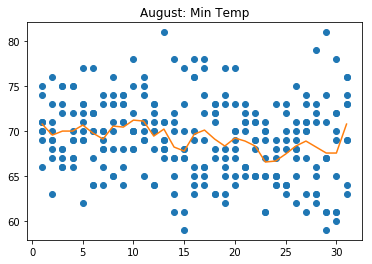

In [38]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))

dayAug = day
for i in range(1, 9):
    dayAug = np.vstack((dayAug, day))

plt.plot(dayAug, dataaug[:, 7], 'o')

avg = np.zeros((31, 1))
for i in range(0, 9):
    for j in range(0, 31):
        avg[j] = avg[j] + dataaug[i * 31 + j][7]
plt.title("August: Min Temp")
plt.plot(dayAug[:31], avg / 9)

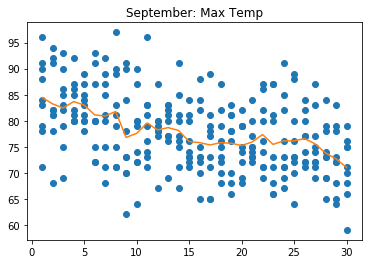

In [39]:
day = [1]
for i in range(2, 31):
    day = np.vstack((day, [i]))

daySep = day
for i in range(1, 9):
    daySep = np.vstack((daySep, day))

plt.plot(daySep, datasep[:, 6], 'o')

avg = np.zeros((30, 1))
for i in range(0, 9):
    for j in range(0, 30):
        avg[j] = avg[j] + datasep[i * 30 + j][6]
plt.title("September: Max Temp")
plt.plot(daySep[:30], avg / 9)


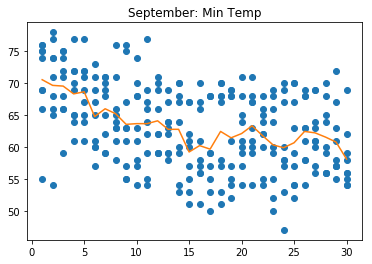

In [40]:
day = [1]
for i in range(2, 31):
    day = np.vstack((day, [i]))

daySep = day
for i in range(1, 9):
    daySep = np.vstack((daySep, day))

plt.plot(daySep, datasep[:, 7], 'o')

avg = np.zeros((30, 1))
for i in range(0, 9):
    for j in range(0, 30):
        avg[j] = avg[j] + datasep[i * 30 + j][7]
plt.title("September: Min Temp")
plt.plot(daySep[:30], avg / 9)


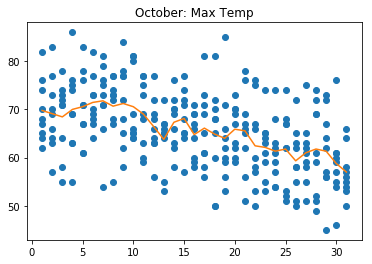

In [41]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))

dayOct = day
for i in range(1, 9):
    dayOct = np.vstack((dayOct, day))

plt.plot(dayOct, dataoct[:, 6], 'o')

avg = np.zeros((31, 1))
for i in range(0, 9):
    for j in range(0, 31):
        avg[j] = avg[j] + dataoct[i * 31 + j][6]
plt.title("October: Max Temp")
plt.plot(dayOct[:31], avg / 9)


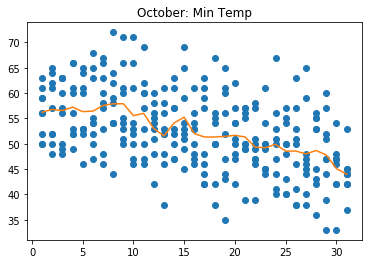

In [42]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))

dayOct = day
for i in range(1, 9):
    dayOct = np.vstack((dayOct, day))

plt.plot(dayOct, dataoct[:, 7], 'o')

avg = np.zeros((31, 1))
for i in range(0, 9):
    for j in range(0, 31):
        avg[j] = avg[j] + dataoct[i * 31 + j][7]
plt.title("October: Min Temp")
plt.plot(dayOct[:31], avg / 9)


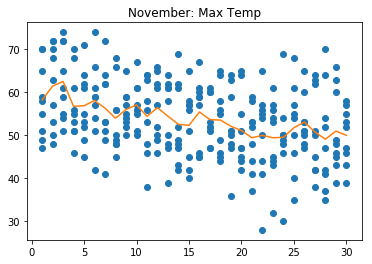

In [43]:
day = [1]
for i in range(2, 31):
    day = np.vstack((day, [i]))

dayNov = day
for i in range(1, 9):
    dayNov = np.vstack((dayNov, day))

plt.plot(dayNov, datanov[:, 6], 'o')

avg = np.zeros((30, 1))
for i in range(0, 9):
    for j in range(0, 30):
        avg[j] = avg[j] + datanov[i * 30 + j][6]
plt.title("November: Max Temp")
plt.plot(dayNov[:30], avg / 9)


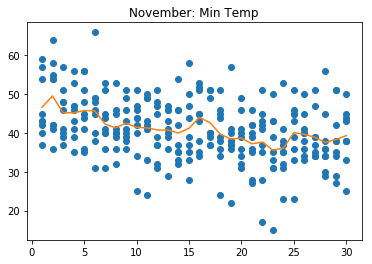

In [44]:
day = [1]
for i in range(2, 31):
    day = np.vstack((day, [i]))

dayNov = day
for i in range(1, 9):
    dayNov = np.vstack((dayNov, day))

plt.plot(dayNov, datanov[:, 7], 'o')

avg = np.zeros((30, 1))
for i in range(0, 9):
    for j in range(0, 30):
        avg[j] = avg[j] + datanov[i * 30 + j][7]
plt.title("November: Min Temp")
plt.plot(dayNov[:30], avg / 9)


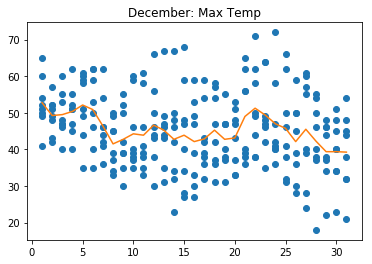

In [45]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))

dayDec = day
for i in range(1, 8):
    dayDec = np.vstack((dayDec, day))

plt.plot(dayDec, datadec[:, 6], 'o')

avg = np.zeros((31, 1))
for i in range(0, 8):
    for j in range(0, 31):
        avg[j] = avg[j] + datadec[i * 31 + j][6]
plt.title("December: Max Temp")
plt.plot(dayDec[:31], avg / 8)


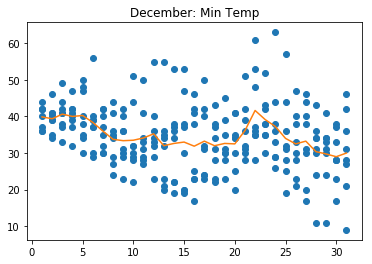

In [46]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))

dayDec = day
for i in range(1, 8):
    dayDec = np.vstack((dayDec, day))

plt.plot(dayDec, datadec[:, 7], 'o')

avg = np.zeros((31, 1))
for i in range(0, 8):
    for j in range(0, 31):
        avg[j] = avg[j] + datadec[i * 31 + j][7]
plt.title("December: Min Temp")
plt.plot(dayDec[:31], avg / 8)
